## Browse the data

In [91]:
import pandas as pd

In [2]:
df = pd.read_csv('Dataset for Assignment.csv')

In [3]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park


## Get population data by using API

In [2]:
import json
import sys
sys.path.append('/home/nbuser/library/')
#import pandas as pd
import requests

In [5]:
   def get_population(Longitude,Latitude):
        
    """Take longitude and latitude as input,return the population data"""
    
    url = 'https://datafinder.stats.govt.nz/services/query/v1/vector.json'

    params = {
        'key' : '2d72e13b9d474aa29e6c9f1847b8bcd0',
        'layer' : 104612,
        'x': Longitude,
        'y': Latitude
    }

    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        return response.status_code
    
    population = response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']
    
    return population

In [6]:
get_population(174.892612,-36.979037)

231

## Calling the API for each property in our csv file and appending result to dataframe

In [35]:
sample = df.head(100)
sample

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100,1050000,-36.943929,174.780501,7007917,63,15,24,33,30,39,Mangere Bridge
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531,2525000,-36.849239,174.734451,7004908,33,12,18,12,15,9,Ponsonby
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024,1400000,-36.907700,174.796042,7005903,36,33,39,21,12,24,One Tree Hill
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80,475000,-37.033322,174.898113,7009808,45,27,15,12,12,12,Manurewa
9,4,2.0,"39a Keegan Drive Massey, Auckland",204,660000,-36.846208,174.620794,7003826,30,27,36,15,24,12,Massey


In [38]:
df['population'] = df.apply(lambda row: get_population(row['Longitude'], row['Latitude']), axis=1)

In [39]:
df

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,population
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100,1050000,-36.943929,174.780501,7007917,63,15,24,33,30,39,Mangere Bridge,195
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531,2525000,-36.849239,174.734451,7004908,33,12,18,12,15,9,Ponsonby,102
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024,1400000,-36.907700,174.796042,7005903,36,33,39,21,12,24,One Tree Hill,162
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80,475000,-37.033322,174.898113,7009808,45,27,15,12,12,12,Manurewa,126
9,4,2.0,"39a Keegan Drive Massey, Auckland",204,660000,-36.846208,174.620794,7003826,30,27,36,15,24,12,Massey,141


## To get the Deprivation Index
#### download and upload the file

In [12]:
!curl http://www.fmhs.auckland.ac.nz/content/dam/uoa/fmhs/soph/epi/hgd/docs/MB2013_datazones.xlsx -0

In [23]:
xls = pd.ExcelFile('otago730395.xlsx')
df2 = pd.read_excel(xls,'NZDep2018_SA1')

In [24]:
df2.head(20)

,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,7000000,10.0,1245.0,141,100100,North Cape
1,7000001,10.0,1245.0,114,100100,North Cape
2,7000002,NaN,NaN,0,100300,Inlets Far North District
3,7000003,10.0,1207.0,225,100100,North Cape
4,7000004,9.0,1093.0,138,100100,North Cape
5,7000005,10.0,1253.0,174,100100,North Cape
6,7000006,9.0,1093.0,105,100100,North Cape
7,7000007,9.0,1072.0,240,100100,North Cape
8,7000008,8.0,1044.0,228,100100,North Cape
9,7000009,8.0,1029.0,120,100100,North Cape


In [27]:
df2 = df2[['SA12018_code','NZDep2018']]

In [29]:
df2.head()

,SA12018_code,NZDep2018
0,7000000,10.0
1,7000001,10.0
2,7000002,NaN
3,7000003,10.0
4,7000004,9.0


### Join two tables by SA1 code

In [40]:
df3 = df.merge(df2, left_on = 'SA1',right_on ='SA12018_code',suffixes=('_left', '_right'))

In [41]:
df3

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,population,SA12018_code,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,7009770,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,7009991,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,7009991,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,7007871,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,7008902,9.0
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100,1050000,-36.943929,174.780501,7007917,63,15,24,33,30,39,Mangere Bridge,195,7007917,4.0
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531,2525000,-36.849239,174.734451,7004908,33,12,18,12,15,9,Ponsonby,102,7004908,4.0
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024,1400000,-36.907700,174.796042,7005903,36,33,39,21,12,24,One Tree Hill,162,7005903,4.0
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80,475000,-37.033322,174.898113,7009808,45,27,15,12,12,12,Manurewa,126,7009808,10.0
9,4,2.0,"39a Keegan Drive Massey, Auckland",204,660000,-36.846208,174.620794,7003826,30,27,36,15,24,12,Massey,141,7003826,6.0


### Save the new table as CSV file for data cleaning

In [42]:
df3.to_csv('data_with_2_more_columns.csv')

In [3]:
import matplotlib.pylab as plt
import seaborn as sns

In [113]:
dataset = pd.read_csv('data_with_2_more_columns.csv')
dataset

,Unnamed: 0,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,population,SA12018_code,NZDep2018
0,0,5,3.0000000,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.0129205,174.9040694,7009770,48,27,24,21,24,21,Manurewa,174,7009770,6.0000000
1,1,5,3.0000000,"8 Corsica Way Karaka, Auckland",564,1250000,-37.0636724,174.9229121,7009991,42,18,12,21,15,30,Karaka,129,7009991,1.0000000
2,2,6,4.0000000,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.0635797,174.9240444,7009991,42,18,12,21,15,30,Karaka,129,7009991,1.0000000
3,3,2,1.0000000,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.9129964,174.7874249,7007871,42,6,21,21,12,15,Onehunga,120,7007871,2.0000000
4,4,3,1.0000000,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.9790369,174.8926119,7008902,93,27,33,30,21,33,Clover Park,231,7008902,9.0000000
5,5,3,1.0000000,"14 Tainui Terrace Mangere Bridge, Auckland",100,1050000,-36.9439289,174.7805015,7007917,63,15,24,33,30,39,Mangere Bridge,195,7007917,4.0000000
6,6,3,1.0000000,"54 Kelmarna Avenue Ponsonby, Auckland",531,2525000,-36.8492389,174.7344513,7004908,33,12,18,12,15,9,Ponsonby,102,7004908,4.0000000
7,7,3,2.0000000,"39 Rawhiti Road One Tree Hill, Auckland",1024,1400000,-36.9077000,174.7960425,7005903,36,33,39,21,12,24,One Tree Hill,162,7005903,4.0000000
8,8,3,2.0000000,"17b Tawa Crescent Manurewa, Auckland",80,475000,-37.0333224,174.8981131,7009808,45,27,15,12,12,12,Manurewa,126,7009808,10.0000000
9,9,4,2.0000000,"39a Keegan Drive Massey, Auckland",204,660000,-36.8462083,174.6207944,7003826,30,27,36,15,24,12,Massey,141,7003826,6.0000000


### Drop the irrelevent and duplicate coloums

In [114]:
dataset = dataset.drop(columns=['SA12018_code','Unnamed: 0'])

In [11]:
dataset

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,population,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100,1050000,-36.943929,174.780502,7007917,63,15,24,33,30,39,Mangere Bridge,195,4.0
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531,2525000,-36.849239,174.734451,7004908,33,12,18,12,15,9,Ponsonby,102,4.0
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024,1400000,-36.907700,174.796042,7005903,36,33,39,21,12,24,One Tree Hill,162,4.0
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80,475000,-37.033322,174.898113,7009808,45,27,15,12,12,12,Manurewa,126,10.0
9,4,2.0,"39a Keegan Drive Massey, Auckland",204,660000,-36.846208,174.620794,7003826,30,27,36,15,24,12,Massey,141,6.0


In [12]:
dataset.shape

(1051, 17)

### Dealing with null value

In [43]:
dataset.isnull().values.any()

True

In [40]:
dataset.isnull().sum().sum()

3

Find the total number of the null values

In [42]:
dataset1 = dataset[dataset.isna().any(axis=1)]
print (dataset1)

     Unnamed: 0  Bedrooms  Bathrooms  \
309         309         4        nan   
311         311         4        nan   
568         568         1      1.000   

                                               Address Land area       CV  \
309                  14 Hea Road Hobsonville, Auckland       214  1250000   
311                  16 Hea Road Hobsonville, Auckland       245  1100000   
568  14 Te Rangitawhiri Road Great Barrier Island, ...      2141   740000   

     Latitude  Longitude      SA1  0-19 years  20-29 years  30-39 years  \
309   -36.798    174.647  7002267          60           66           60   
311   -36.798    174.647  7002267          60           66           60   
568   -36.197    175.417  7001131          27            6            6   

     40-49 years  50-59 years  60+ years      Suburbs  population  \
309           24           24         18  Hobsonville         252   
311           24           24         18  Hobsonville         252   
568           18      

There are three NaN values in this dataset. The first two values are the bathrooms number in the 4-bedroom house.I think it's reasonable to use the mean value from other 4 bedroom to fill them. The third NaN value is the suburb name of a house, which is located at the Great Barrier Island, so we can simple use Great Barrier Island to fill it.

In [47]:
bedroom_4 = dataset['Bedrooms'] == 4
mean_for_bedroom_4 = dataset.loc[bedroom_4, 'Bathrooms'].mean()
mean_for_bedroom_4

2.213675213675214

The mean is around 2, so I will use 2 to fill the NaN value here.

In [115]:
dataset.fillna({'Bathrooms':2}, inplace=True)

In [116]:
dataset.fillna({'Suburbs':'Great Barrier Island' }, inplace=True)

In [117]:
dataset.isnull().sum().sum()

0

Fill up the dataset with values

In [118]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)

change the float_format of pandas in pandas set_option to get rid of sentific notation

In [10]:
dataset.describe()

,Bedrooms,Bathrooms,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,population,NZDep2018
count,1051.0000000,1051.0000000,1051.0000000,1051.0000000,1051.0000000,1051.0000000,1051.0000000,1051.0000000,1051.0000000,1051.0000000,1051.0000000,1051.0000000,1051.0000000,1051.0000000
mean,3.7773549,2.0732636,1387520.5518554,-36.8937149,174.7993254,7006319.1826832,47.5490010,28.9638440,27.0428164,24.1255947,22.6156042,29.3606089,179.9143673,5.0637488
std,1.1694122,0.9920439,1182939.3647126,0.1301004,0.1195384,2591.2617627,24.6922048,21.0374411,17.9754084,10.9427698,10.2105783,21.8050306,71.0592797,2.9134710
min,1.0000000,1.0000000,270000.0000000,-37.2650209,174.3170782,7001130.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,3.0000000,1.0000000
25%,3.0000000,1.0000000,780000.0000000,-36.9505652,174.7207792,7004415.5000000,33.0000000,15.0000000,15.0000000,18.0000000,15.0000000,18.0000000,138.0000000,2.0000000
50%,4.0000000,2.0000000,1080000.0000000,-36.8931322,174.7985754,7006325.0000000,45.0000000,24.0000000,24.0000000,24.0000000,21.0000000,27.0000000,174.0000000,5.0000000
75%,4.0000000,3.0000000,1600000.0000000,-36.8557886,174.8809439,7008383.5000000,57.0000000,36.0000000,33.0000000,30.0000000,27.0000000,36.0000000,210.0000000,8.0000000
max,17.0000000,8.0000000,18000000.0000000,-36.1776547,175.4924245,7011028.0000000,201.0000000,270.0000000,177.0000000,114.0000000,90.0000000,483.0000000,789.0000000,10.0000000


The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles.

There are some houses that with 17 bedrooms, 8 bathrooms

In [20]:
dataset.dtypes

Bedrooms         int64
Bathrooms      float64
Address         object
Land area       object
CV               int64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
Suburbs         object
population       int64
NZDep2018      float64
dtype: object

In [119]:
dataset['Land area'] = dataset['Land area'].str.extract('(\d+)').astype(float)

Convert land area to float type without square meter.

In [120]:
dataset.dtypes

Bedrooms         int64
Bathrooms      float64
Address         object
Land area      float64
CV               int64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
Suburbs         object
population       int64
NZDep2018      float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3142825c0>,
      dtype=object)

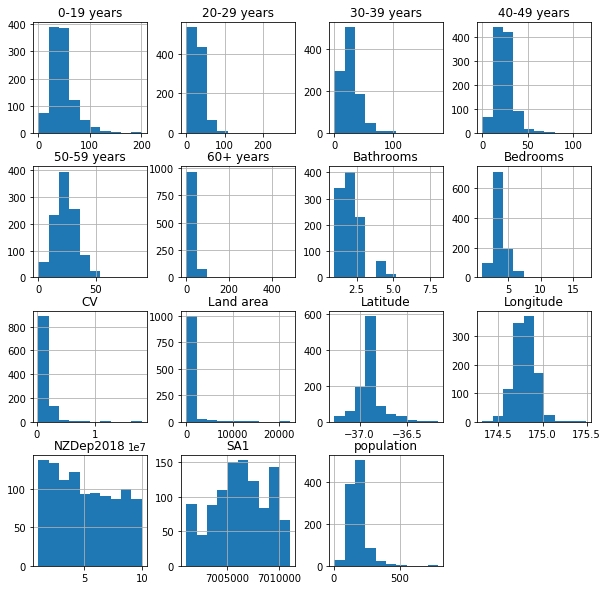

In [59]:
dataset.hist(figsize=(10,10))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


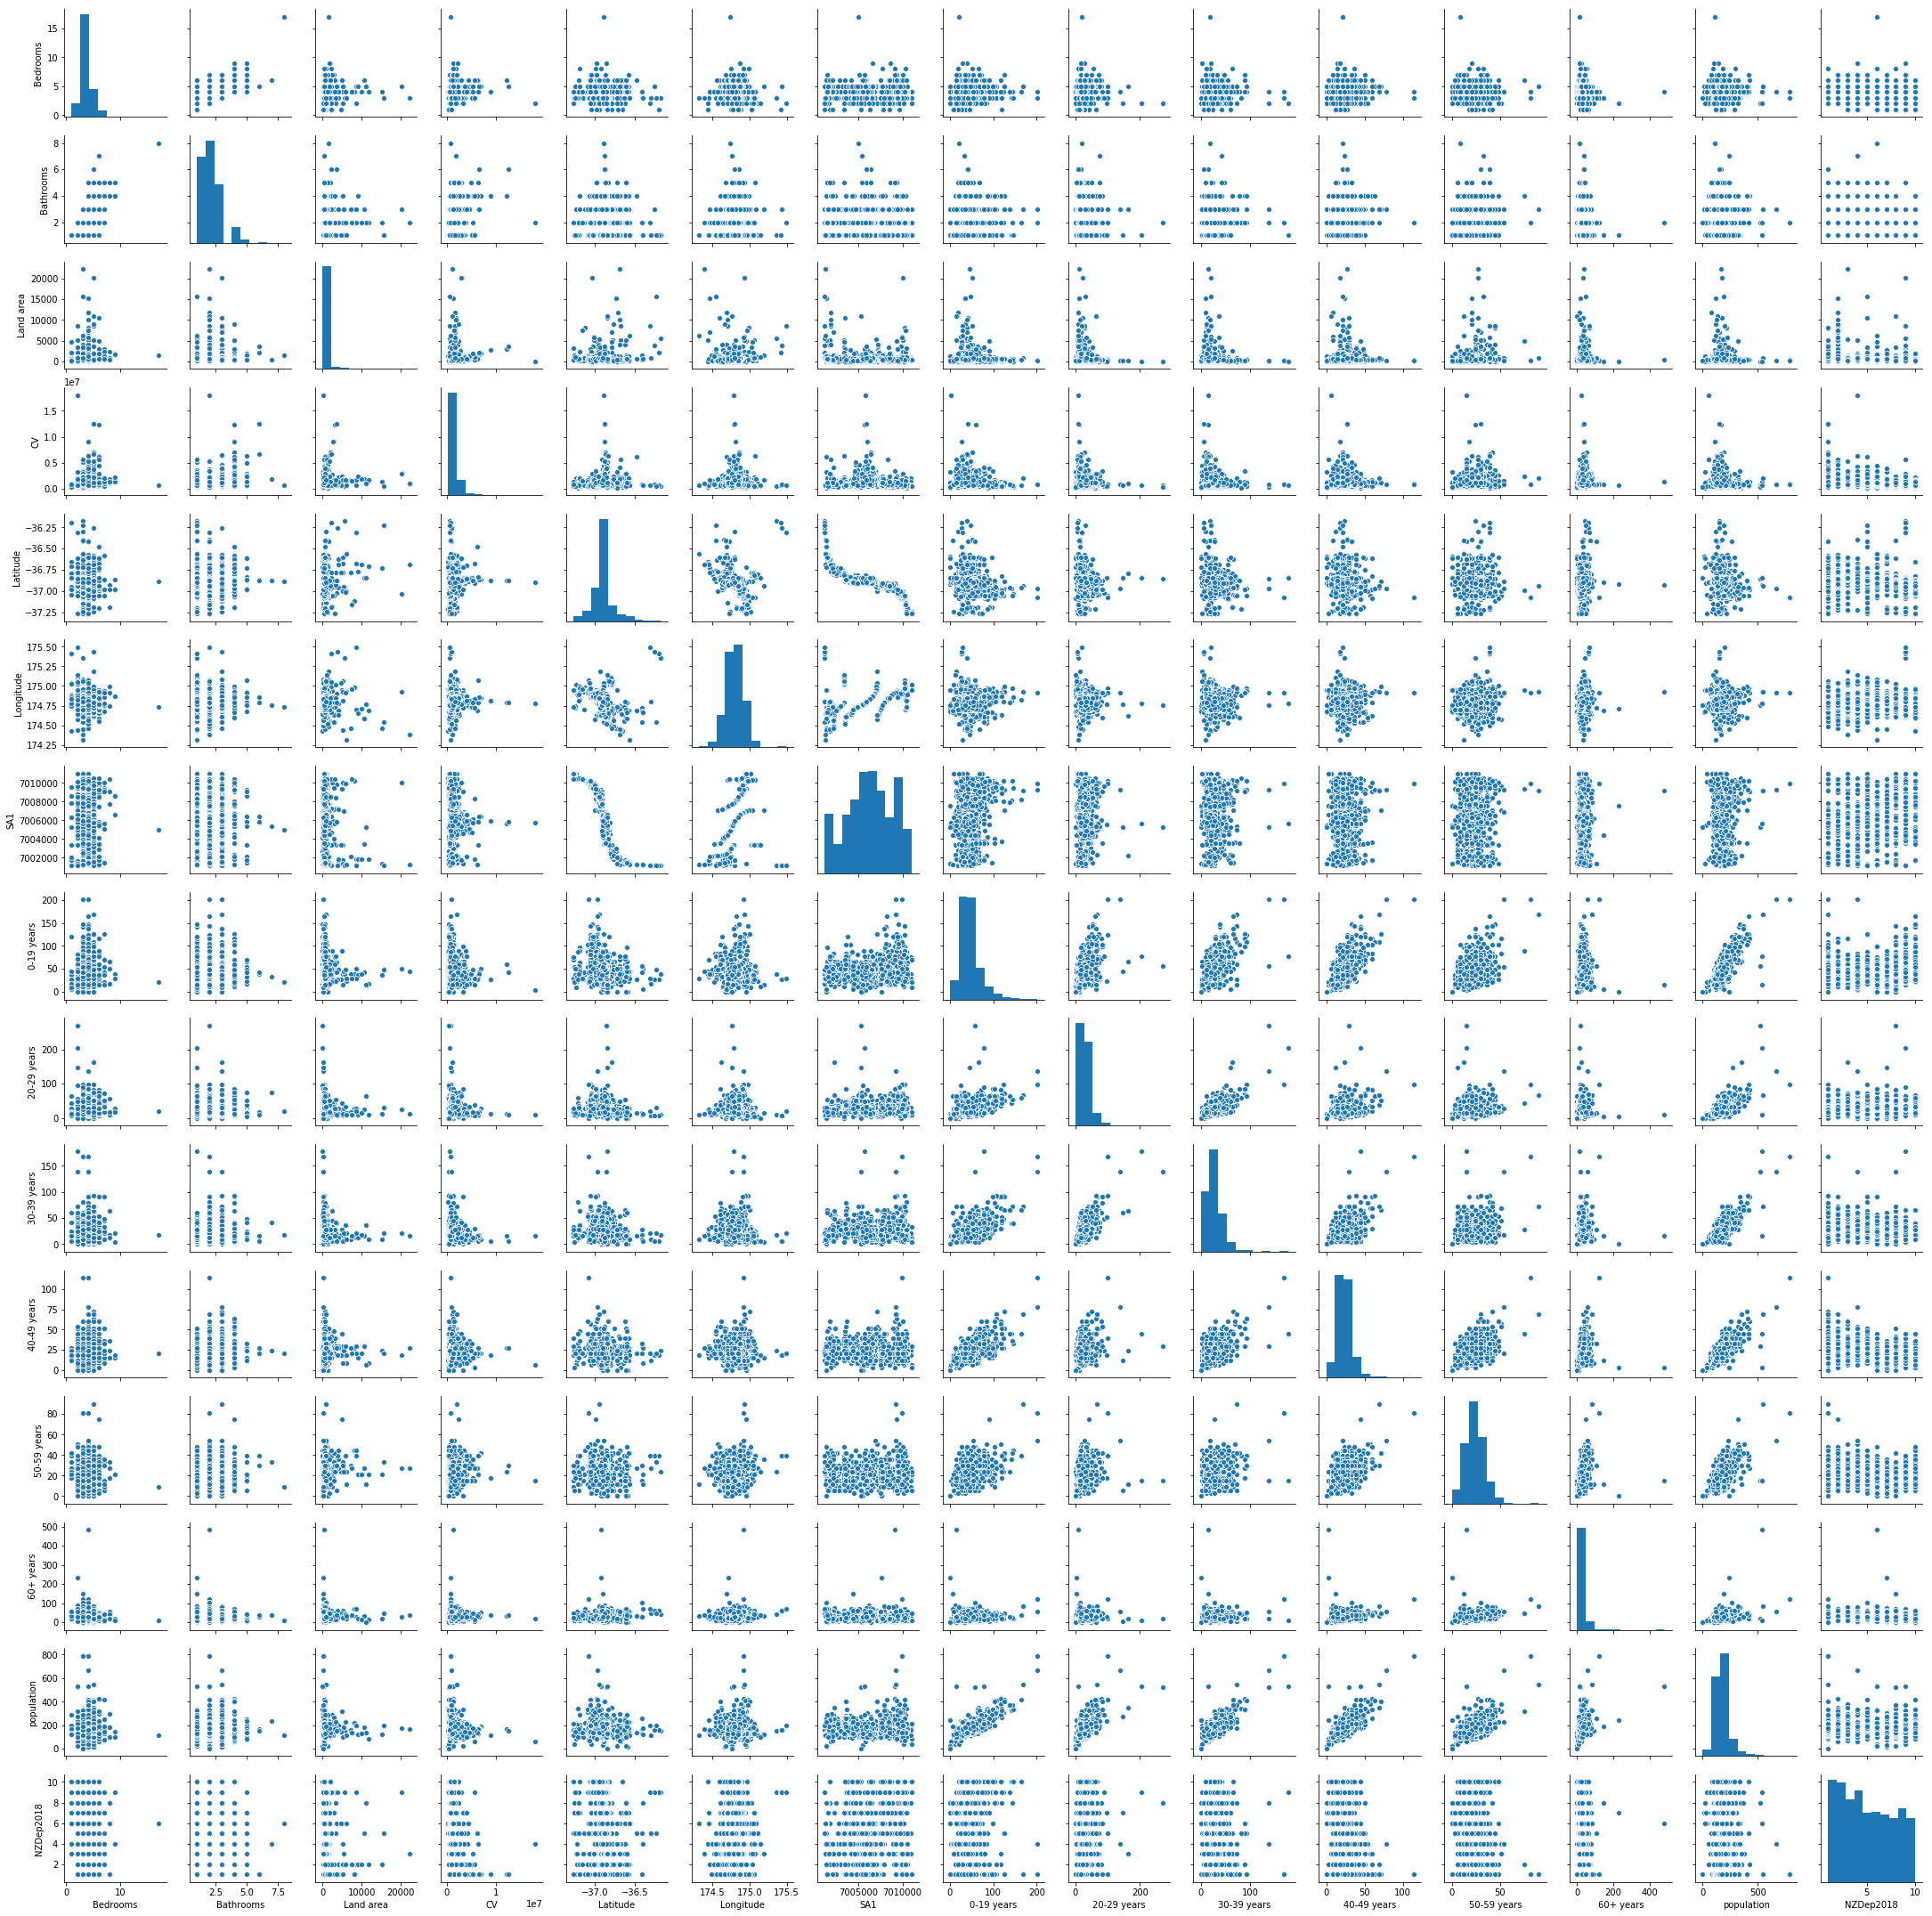

In [60]:
sns.pairplot(dataset,size = 2.0)

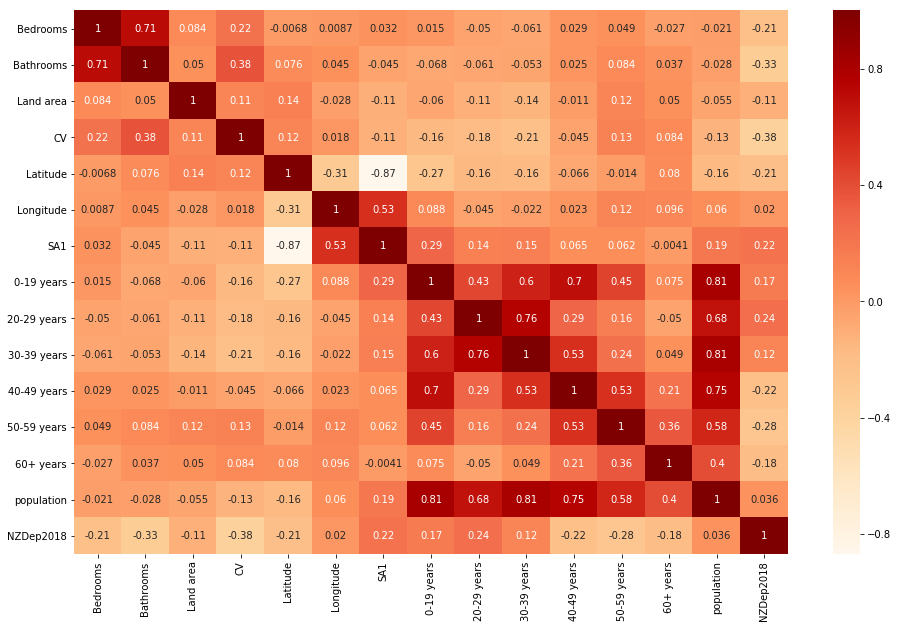

In [64]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

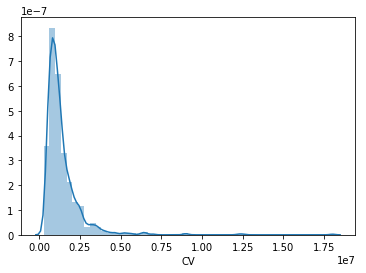

In [65]:
sns.distplot(dataset['CV'])

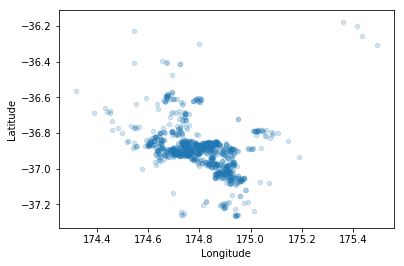

In [44]:
dataset.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2)
plt.savefig('map1.png')

create a scatter plot with latitude and longitude to visualize the data

In [78]:
corr_matrix = dataset.corr()
corr_matrix["CV"].sort_values(ascending=False)

CV             1.0000000
Bathrooms      0.3758914
Bedrooms       0.2248361
50-59 years    0.1310294
Latitude       0.1206094
Land area      0.1122202
60+ years      0.0835315
Longitude      0.0183167
40-49 years   -0.0445647
SA1           -0.1099203
population    -0.1284738
0-19 years    -0.1560097
20-29 years   -0.1824583
30-39 years   -0.2143120
NZDep2018     -0.3781205
Name: CV, dtype: float64

let’s look at how much each independent variable correlates with this dependent variable.
The price of the house increases when the finished sqft and the number of bathrooms go up. You can see some negative correlation among them. Coefficients close to zero indicate that there is no linear correlation.

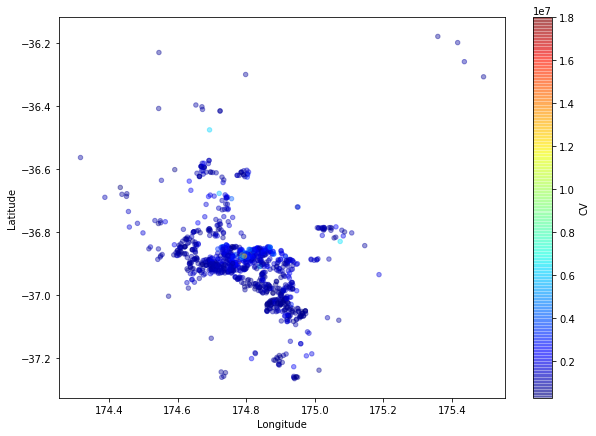

In [46]:
dataset.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4, figsize=(10,7),
    c="CV", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

 use color code from the most expensive to the least expensive areas

### Explore the price with geographical data

In [121]:
dataset['price_per_sqmt'] = dataset['CV']/dataset['Land area']
corr_matrix = dataset.corr()
corr_matrix["CV"].sort_values(ascending=False)

CV                1.0000000
price_per_sqmt    0.4537424
Bathrooms         0.3758914
Bedrooms          0.2248361
50-59 years       0.1310294
Latitude          0.1206094
Land area         0.1122202
60+ years         0.0835315
Longitude         0.0183167
40-49 years      -0.0445647
SA1              -0.1099203
population       -0.1284738
0-19 years       -0.1560097
20-29 years      -0.1824583
30-39 years      -0.2143120
NZDep2018        -0.3781205
Name: CV, dtype: float64

Since each house has different land area and each suburbs has different home prices,we can add a new price_per_sqmt variable correlates with house value

In [122]:
len(dataset['Suburbs'].value_counts())

190

There are 190 suburbs can be used to group

In [123]:
freq = dataset.groupby('Suburbs').count()['Address']
mean = dataset.groupby('Suburbs').mean()['price_per_sqmt']
cluster = pd.concat([freq, mean], axis=1)
cluster['Suburbs'] = cluster.index
cluster.columns = ['freq', 'price_per_sqmt','Suburbs']
cluster.describe()

,freq,price_per_sqmt
count,190.0000000,190.0000000
mean,5.5315789,3027.4001793
std,7.3258658,3522.9166098
min,1.0000000,35.3697749
25%,1.2500000,1246.1073824
50%,3.0000000,2348.7391966
75%,6.0000000,3874.3248465
max,61.0000000,40723.8286969


Showing the low price suburbs

In [124]:
cluster1 = cluster[cluster.price_per_sqmt < 2348]
cluster1.index

Index(['Albany Heights', 'Alfriston', 'Army Bay', 'Beach Haven', 'Beachlands',
       'Birkdale', 'Botany Downs', 'Buckland', 'Burswood', 'Clarks Beach',
       'Clendon Park', 'Clover Park', 'Cockle Bay', 'Conifer Grove', 'Drury',
       'East Tamaki Heights', 'Farm Cove', 'Glen Innes', 'Glenfield',
       'Golflands', 'Great Barrier Island',
       'Great Barrier Island (Aotea Island)', 'Green Bay', 'Gulf Harbour',
       'Half Moon Bay', 'Helensville', 'Henderson', 'Highland Park',
       'Hillsborough', 'Huapai', 'Huia', 'Kaipara Flats', 'Karaka',
       'Kawakawa Bay', 'Kelston', 'Laingholm', 'Leigh', 'Lynfield',
       'Manurewa East', 'Maraetai', 'Massey', 'Matakatia', 'Mellons Bay',
       'Murrays Bay', 'Narrow Neck', 'Omiha', 'Oneroa', 'Onetangi', 'Opaheke',
       'Orewa', 'Ostend', 'Otara', 'Pahurehure', 'Pakuranga', 'Palm Beach',
       'Papakura', 'Paremoremo', 'Patumahoe', 'Point Chevalier',
       'Point England', 'Pokeno', 'Pukekohe', 'Ramarama', 'Ranui', 'Red Beach',


high price and low frequency suburbs

In [125]:
cluster_temp = cluster[cluster.price_per_sqmt >= 2348]
cluster2 = cluster_temp[cluster_temp.freq <3]
cluster2.index

Index(['Belmont', 'Bombay', 'Browns Bay', 'Campbells Bay', 'Chatswood',
       'Dairy Flat', 'Dannemora', 'Eastern Beach', 'Eden Terrace',
       'Forrest Hill', 'Freemans Bay', 'Hatfields Beach', 'Hillcrest', 'Hunua',
       'Kingsland', 'Manukau', 'Mauku', 'Milford', 'Northcote', 'Okura',
       'One Tree Hill', 'Oteha', 'Paerata', 'Parakai', 'Penrose', 'Pinehill',
       'Pohuehue', 'Rakino Island', 'Rothesay Bay', 'Royal Oak',
       'Schnapper Rock', 'Wade Heads', 'Wai O Taiki Bay', 'Westmere',
       'Whenuapai', 'Windsor Park'],
      dtype='object', name='Suburbs')

High price and high frequency Suburbs

In [126]:
cluster3 = cluster_temp[cluster_temp.freq >=3]
cluster3.index

Index(['Auckland Central', 'Avondale', 'Birkenhead', 'Blockhouse Bay',
       'Bucklands Beach', 'East Tamaki', 'Ellerslie', 'Epsom', 'Favona',
       'Flat Bush', 'Glen Eden', 'Glendene', 'Glendowie', 'Goodwood Heights',
       'Greenlane', 'Grey Lynn', 'Herne Bay', 'Hobsonville', 'Howick',
       'Kohimarama', 'Kumeu', 'Long Bay', 'Mangere', 'Mangere Bridge',
       'Mangere East', 'Manurewa', 'Meadowbank', 'Mission Bay', 'Morningside',
       'Mount Albert', 'Mount Eden', 'Mount Roskill', 'Mount Wellington',
       'New Lynn', 'New Windsor', 'Onehunga', 'Orakei', 'Otahuhu',
       'Pakuranga Heights', 'Panmure', 'Papatoetoe', 'Parnell', 'Ponsonby',
       'Randwick Park', 'Remuera', 'Saint Johns', 'Saint Marys Bay',
       'Sandringham', 'St Heliers', 'Stonefields', 'Sunnyvale',
       'Te Atatu South', 'Three Kings', 'Torbay', 'Totara Heights',
       'Waiheke Island', 'Waterview', 'Wesley', 'West Harbour'],
      dtype='object', name='Suburbs')

Group column based on the clusters

In [127]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
dataset['group'] = dataset.Suburbs.apply(get_group)

In [86]:
dataset.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,population,NZDep2018,price_per_sqmt,group
0,5,3.0000000,"106 Lawrence Crescent Hill Park, Auckland",714.0000000,960000,-37.0129205,174.9040694,7009770,48,27,24,21,24,21,Manurewa,174,6.0000000,1344.5378151,high_price_high_freq
1,5,3.0000000,"8 Corsica Way Karaka, Auckland",564.0000000,1250000,-37.0636724,174.9229121,7009991,42,18,12,21,15,30,Karaka,129,1.0000000,2216.3120567,low_price
2,6,4.0000000,"243 Harbourside Drive Karaka, Auckland",626.0000000,1250000,-37.0635797,174.9240444,7009991,42,18,12,21,15,30,Karaka,129,1.0000000,1996.8051118,low_price
3,2,1.0000000,"2/30 Hardington Street Onehunga, Auckland",65.0000000,740000,-36.9129964,174.7874249,7007871,42,6,21,21,12,15,Onehunga,120,2.0000000,11384.6153846,high_price_high_freq
4,3,1.0000000,"59 Israel Avenue Clover Park, Auckland",601.0000000,630000,-36.9790369,174.8926119,7008902,93,27,33,30,21,33,Clover Park,231,9.0000000,1048.2529118,low_price


After grouping into different clusters, I don't need the following columns anymore

In [128]:
dataset.drop(['Latitude','Longitude','Address','Suburbs','price_per_sqmt'], axis=1, inplace=True)

In [129]:
dataset.head()

,Bedrooms,Bathrooms,Land area,CV,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,population,NZDep2018,group
0,5,3.0000000,714.0000000,960000,7009770,48,27,24,21,24,21,174,6.0000000,high_price_high_freq
1,5,3.0000000,564.0000000,1250000,7009991,42,18,12,21,15,30,129,1.0000000,low_price
2,6,4.0000000,626.0000000,1250000,7009991,42,18,12,21,15,30,129,1.0000000,low_price
3,2,1.0000000,65.0000000,740000,7007871,42,6,21,21,12,15,120,2.0000000,high_price_high_freq
4,3,1.0000000,601.0000000,630000,7008902,93,27,33,30,21,33,231,9.0000000,low_price


## Machine Learning model

In [167]:
from sklearn.model_selection import train_test_split

x = dataset.drop('CV',axis=1)

n = pd.get_dummies(dataset.group)
x = pd.concat([x, n], axis=1)
drops = ['group']
x.drop(drops, inplace=True, axis=1)


x.head()


,Bedrooms,Bathrooms,Land area,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,population,NZDep2018,high_price_high_freq,high_price_low_freq,low_price
0,5,3.0000000,714.0000000,7009770,48,27,24,21,24,21,174,6.0000000,1,0,0
1,5,3.0000000,564.0000000,7009991,42,18,12,21,15,30,129,1.0000000,0,0,1
2,6,4.0000000,626.0000000,7009991,42,18,12,21,15,30,129,1.0000000,0,0,1
3,2,1.0000000,65.0000000,7007871,42,6,21,21,12,15,120,2.0000000,1,0,0
4,3,1.0000000,601.0000000,7008902,93,27,33,30,21,33,231,9.0000000,0,0,1


To predict the house price, I need to drop the CV column which is the attribute that ML model to predict. Address and Suburbs contain STR data, which is not able to put into the Regression model.SA1 code is not a necessary attribute in this case. 

In [168]:
y = dataset['CV']
y.head()

0     960000
1    1250000
2    1250000
3     740000
4     630000
Name: CV, dtype: int64

In [169]:
import numpy as np
y = np.log1p(y)

The CV price is skewed and I transformed it to logarithm before putting into regression

In [198]:
train_x, test_x, train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=42)

In [199]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [200]:
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [201]:
model.coef_

array([ 1.83485758e-02,  1.34644630e-01,  3.69466195e-05, -1.13032699e-05,
       -3.17873309e-03, -3.08835734e-03, -7.18466379e-03, -2.68222200e-03,
        4.01099547e-03, -4.22398123e-04,  2.58600370e-03, -6.84134005e-02,
        1.30731876e-01,  1.07251501e-01, -2.37983377e-01])

In [202]:
predicted = model.predict(test_x)

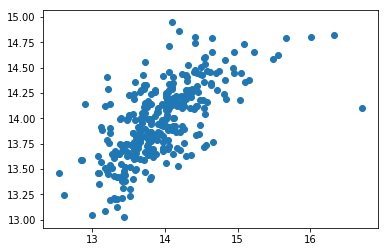

In [203]:
plt.scatter(test_y,predicted)

The correlation is indeed strong; you can clearly see the upward trend and that the points are not too dispersed.

In [204]:
print('Linear Regression R squared": %.4f' % model.score(test_x, test_y))

Linear Regression R squared": 0.4365


43.65% of the variability in Y can be explained using X. This is not that good.

In [205]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(predicted, np.expm1(test_y))
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 1978728.8932


Linear Regression Model predict value of every house is 1978728

### Random Forest Regression

Let's try something more

In [206]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor()

In [207]:
model1.fit(train_x, train_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [208]:
predicted1 = model1.predict(test_x)

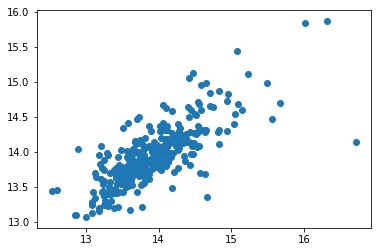

In [209]:
plt.scatter(test_y,predicted1)

In [210]:
print('Random Forest R squared": %.4f' % model1.score(test_x, test_y))

Random Forest R squared": 0.5728


In [211]:
forest_mse = mean_squared_error(predicted1, np.expm1(test_y))
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 1978728.8477


it's getting better now

### Gradient boosting

In [212]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model2 = ensemble.GradientBoostingRegressor()
model2.fit(train_x, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [217]:
print('Gradient Boosting R squared": %.4f' % model2.score(test_x, test_y))

Gradient Boosting R squared": 0.5903


It's the best model so far

In [214]:
predicted2 = model2.predict(test_x)

In [215]:
model_mse = mean_squared_error(predicted2, np.expm1(test_y))
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 1978728.8512


### Feature Importance

In [219]:
feature_labels = np.array(['Bedrooms', 'Bathrooms', 'Land area', 'SA1', '0-19 years', '20-29 years', 
                           '30-39 years', '40-49 years', '50-59 years', '60+ years', 'population', 'NZDep2018', 
                          'high_price_high_freq', 'high_price_low_freq', 'low_price'])
importance = model2.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

high_price_low_freq-0.20%
50-59 years-0.83%
20-29 years-0.95%
40-49 years-1.10%
0-19 years-1.32%
high_price_high_freq-1.38%
population-1.76%
Bedrooms-2.90%
60+ years-3.19%
30-39 years-3.72%
low_price-7.57%
Bathrooms-10.41%
Land area-16.14%
SA1-22.55%
NZDep2018-25.97%


It shows in Gradient boosting, which features are more important